In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [5]:
data=pd.read_excel('Online Retail (1).xlsx')

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.shape

(541909, 8)

In [9]:
data['CustomerID'].nunique()

4372

In [10]:
data['InvoiceNo'].nunique()

25900

# EDA

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
data.shape

(541909, 8)

In [14]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
((data.isna().sum())/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [16]:
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
data[data['InvoiceNo']==536414]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom


In [18]:
data[data['UnitPrice']==0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [19]:
# When we look at the data, We see the unit price to 0.0, so when the unit price is 0, when we cal the total amount i.e unitprice* Quantity that will also amount to 0.
# There can be no was that a customer orders a product in large quantites and pay nothing.
# Also when we look at the record-538919 the quantity is in negative.
# so we're dropping the records with unit price 0

In [20]:
data1=data.copy()

In [21]:
data.drop(index=data[data['UnitPrice']==0.0].index,inplace=True)

In [22]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

In [23]:
df=data[data['CustomerID'].isna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [24]:
cancelled_orders=data[data['InvoiceNo'].astype('str').str.contains('C')]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# As we can see, cancelled orders have negative quantity which means, those are cancelled orders.
# There are 9288 cancelled orders

# Deleting the negative quantities and Unitprice 

In [25]:
data.shape

(539394, 8)

In [27]:
data=data[data['UnitPrice']>0]
data.shape

(539392, 8)

In [28]:
data=data[data['Quantity']>0]
data.shape

(530104, 8)

In [29]:
df['InvoiceNo'].unique()

array([536544, 536555, 536558, ..., 581492, 581497, 581498], dtype=object)

In [30]:
df['CustomerID'].dtype

dtype('float64')

In [31]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [32]:
data.dropna(inplace=True)

for i in (data[data['CustomerID'].isna()].index):
    if(data.loc[i,'InvoiceNo'] in dict_4):
        a=data.loc[i,'InvoiceNo']
        data.loc[i,'CustomerID']=dict_4[a]

In [33]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
# all the missing values are dropped

In [35]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [209]:
print('No of Unique Customers:',data['CustomerID'].nunique())
print('No of Unique Products:',data['StockCode'].nunique())

No of Unique Customers: 4338
No of Unique Products: 3665


In [39]:
# Exploring

In [40]:
data.shape

(397884, 8)

In [41]:
print('The no of unique Products:',data['StockCode'].nunique())
print('The no of of Transactions:',data['InvoiceNo'].nunique())
print('The no of Customers:',data['CustomerID'].nunique())
print('The no of Countries:',data['Country'].nunique())

The no of unique Products: 3665
The no of of Transactions: 18532
The no of Customers: 4338
The no of Countries: 37


In [42]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Creating a new column- total price i.e total price=Quantity * Unit price

In [43]:
data['TotalPrice']=data['Quantity']*data['UnitPrice']

In [44]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [45]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.If this code starts with letter 'c', it indicates a cancellation.**

In [46]:
data['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

# Finding out which transaction had highest sum of purchase:

In [47]:
data.groupby(['InvoiceNo'])['TotalPrice'].sum().to_frame('Sum').reset_index().sort_values(by='Sum',ascending=False).head()

,InvoiceNo,Sum
18499,581483,168469.60
1909,541431,77183.60
7925,556444,38970.00
12417,567423,31698.16
8111,556917,22775.93


**Transaction - Invoice No - 581483**

In [48]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [51]:
data.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').reset_index().sort_values(by='Sum',ascending=False).head()

,CustomerID,Sum
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06


In [52]:
df5=data.groupby(['InvoiceNo','CustomerID','Country'])['Quantity'].sum().to_frame('Qty').reset_index().sort_values(by='Qty',ascending=False).head()

In [210]:
df5

,InvoiceNo,CustomerID,Country,Qty
18499,581483,16446.0,United Kingdom,80995
1909,541431,12346.0,United Kingdom,74215
8111,556917,12415.0,Australia,15049
10611,563076,14646.0,Netherlands,14730
14368,572035,14646.0,Netherlands,13392


* Which country has the highest sum -**United Kingdom**

In [54]:
data['CustomerID'].nunique()

4338

In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [56]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [59]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [60]:
data['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [61]:
data['StockCode'].nunique()

3665

In [62]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [63]:
data[data['StockCode']==71053]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
50,536373,71053,WHITE METAL LANTERN,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom,20.34
67,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,20.34
279,536396,71053,WHITE METAL LANTERN,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom,20.34
417,536406,71053,WHITE METAL LANTERN,8,2010-12-01 11:33:00,3.39,17850.0,United Kingdom,27.12
...,...,...,...,...,...,...,...,...,...
526431,580667,71053,WHITE MOROCCAN METAL LANTERN,2,2011-12-05 14:19:00,3.75,15031.0,United Kingdom,7.50
528001,580727,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-05 17:17:00,8.29,14096.0,United Kingdom,8.29
533686,581099,71053,WHITE MOROCCAN METAL LANTERN,4,2011-12-07 11:43:00,3.75,18219.0,United Kingdom,15.00
534544,581149,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-07 14:12:00,3.75,15471.0,United Kingdom,3.75


In [64]:
data['Description'].nunique()

3877

* So we have discovered that a product can have more than 1 description.
* EG: **WHITE METAL LANTERN** is also called as **WHITE MOROCCAN METAL LANTERN**

In [66]:
data.groupby(['StockCode'])['Description'].nunique().to_frame('Count').reset_index().sort_values(by='Count',ascending=False).head()

,StockCode,Count
1956,23196,4
1996,23236,4
1963,23203,3
2844,17107D,3
2271,23535,3


In [67]:
data[data['StockCode']==23196]['Description'].unique()

array(['RETRO LEAVES MAGNETIC NOTEPAD',
       'RETO LEAVES MAGNETIC SHOPPING LIST',
       'LEAVES MAGNETIC  SHOPPING LIST', 'VINTAGE LEAF MAGNETIC NOTEPAD'],
      dtype=object)

In [68]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [69]:
data['StockCode'].value_counts()

85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
          ... 
90122B       1
22351        1
22323        1
85031C       1
35597A       1
Name: StockCode, Length: 3665, dtype: int64

In [70]:
data.groupby(['StockCode'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)

,Sum
StockCode,
23843,168469.60
22423,142592.95
85123A,100603.50
85099B,85220.78
23166,81416.73
POST,77803.96
47566,68844.33
84879,56580.34
M,53779.93


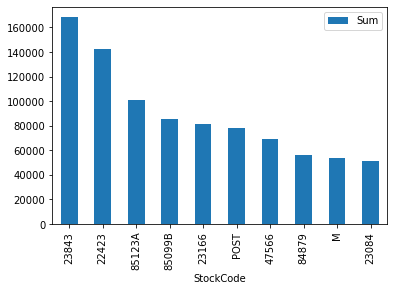

In [71]:
data.groupby(['StockCode'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10).plot(kind='bar')

# We can see that the stockcode 23843 has the highest sum out of all

In [72]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

# Which Product on the whole has been sold(total)

In [73]:
data.groupby(['Description'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)

,Sum
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


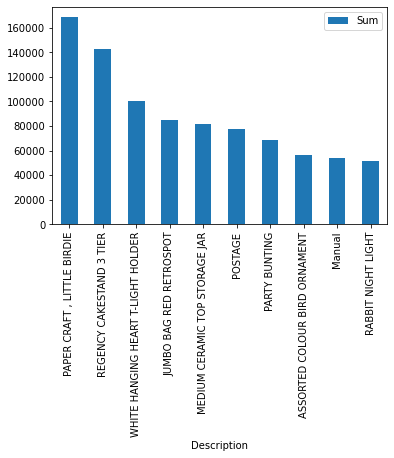

In [74]:
data.groupby(['Description'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10).plot(kind='bar')

# Paper craft,little birdie is the highest

In [75]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

# Customer who has ordered more number of products(Qty)

In [76]:
data.groupby(['CustomerID'])['Quantity'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head()

,Sum
CustomerID,
14646.0,196915
16446.0,80997
14911.0,80265
12415.0,77374
12346.0,74215


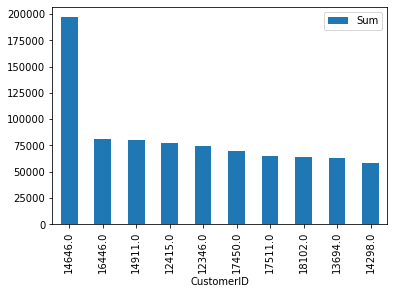

In [78]:
data.groupby(['CustomerID'])['Quantity'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10).plot(kind='bar')

# Customer 14646 has ordered more no of products

In [79]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [80]:
data['Country'].value_counts(normalize=True)*100

United Kingdom          89.051332
Germany                  2.272019
France                   2.096340
EIRE                     1.818621
Spain                    0.624303
Netherlands              0.592886
Belgium                  0.510450
Switzerland              0.462698
Portugal                 0.367444
Australia                0.297072
Norway                   0.269174
Italy                    0.190508
Channel Islands          0.187994
Finland                  0.172161
Cyprus                   0.154316
Sweden                   0.113350
Austria                  0.100029
Denmark                  0.095505
Poland                   0.082939
Japan                    0.080677
Israel                   0.062330
Unspecified              0.061324
Singapore                0.055795
Iceland                  0.045742
USA                      0.044988
Canada                   0.037951
Greece                   0.036443
Malta                    0.028149
United Arab Emirates     0.017090
European Commu

In [81]:
# United Kingdom Contributes the most

# RFM ANALYSIS

R- Recency
F- Frequency
M- Monetary

* Recency - What is recent date of purchase made by the customer?
* Frequency-No of times the customer has purchased
* Monetary- How much money did the customer spend?
* To classify with recency,frequency and monetary values- We should have less recency, more Frequency and monetary values.
* Our main aim here is to find best,average and poor performance customers. Also we can analyze other set of customers to improve the revenue.

In [82]:
pd.DatetimeIndex(data['InvoiceDate']).date

array([datetime.date(2010, 12, 1), datetime.date(2010, 12, 1),
       datetime.date(2010, 12, 1), ..., datetime.date(2011, 12, 9),
       datetime.date(2011, 12, 9), datetime.date(2011, 12, 9)],
      dtype=object)

In [83]:
data['Date']=pd.DatetimeIndex(data['InvoiceDate']).date

In [84]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [85]:
# We can analyse the cancelled orders separetely 
# so for rfm analysis , I'm focussing on only the placed orders and not the cancelled orders

In [86]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [87]:
data.shape

(397884, 10)

In [88]:
data2=data.copy()

In [89]:
data2.shape

(397884, 10)

In [90]:
data[data['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [91]:
data['Date'].max()

datetime.date(2011, 12, 9)

In [92]:
# For analysis purpose, taking the next day
import datetime as dt

In [93]:
today=dt.date(2011,12,10)

# Recency

In [95]:
recency=data.groupby(['CustomerID'])['Date'].max().to_frame('Recentpurchase').reset_index()

In [96]:
recency

,CustomerID,Recentpurchase
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4333,18280.0,2011-03-07
4334,18281.0,2011-06-12
4335,18282.0,2011-12-02
4336,18283.0,2011-12-06


In [97]:
(today-recency['Recentpurchase'])

0      326 days
1        3 days
2       76 days
3       19 days
4      311 days
         ...   
4333   278 days
4334   181 days
4335     8 days
4336     4 days
4337    43 days
Name: Recentpurchase, Length: 4338, dtype: timedelta64[ns]

In [98]:
recency['Recency']=recency['Recentpurchase'].apply(lambda x:(today-x).days)

In [99]:
recency.tail()

,CustomerID,Recentpurchase,Recency
4333,18280.0,2011-03-07,278
4334,18281.0,2011-06-12,181
4335,18282.0,2011-12-02,8
4336,18283.0,2011-12-06,4
4337,18287.0,2011-10-28,43


# Frequency

In [100]:
frequency=data.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('Frequency').reset_index().sort_values(by='Frequency',ascending=False)

In [101]:
frequency

,CustomerID,Frequency
4010,17841.0,7847
1879,14911.0,5675
1289,14096.0,5111
326,12748.0,4595
1661,14606.0,2700
...,...,...
4013,17846.0,1
514,13017.0,1
571,13099.0,1
576,13106.0,1


# Monetary

In [102]:
monetary=data.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').reset_index().sort_values(by='Sum',ascending=False)

In [103]:
monetary[monetary['Sum']<0]

,CustomerID,Sum


In [104]:
monetary.head()

,CustomerID,Sum
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06


In [105]:
recency.shape

(4338, 3)

In [106]:
frequency.shape

(4338, 2)

In [107]:
monetary.shape

(4338, 2)

In [108]:
df6=pd.merge(recency,frequency,on='CustomerID',how='inner')

In [109]:
rfm=pd.merge(df6,monetary,on='CustomerID',how='inner')

In [110]:
rfm.drop('Recentpurchase',axis=1,inplace=True)

In [111]:
rfm.rename(columns={'Sum':'Monetary'},inplace=True)

In [112]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


In [113]:
rfm.shape

(4338, 4)

In [114]:
rfm.set_index(rfm['CustomerID'],inplace=True)

In [115]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,12346.0,326,1,77183.60
12347.0,12347.0,3,182,4310.00
12348.0,12348.0,76,31,1797.24
12349.0,12349.0,19,73,1757.55
12350.0,12350.0,311,17,334.40


In [116]:
rfm.drop('CustomerID',axis=1,inplace=True)

In [117]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [118]:
rfm1=rfm.copy()

# K-Means Clustering - Model

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d=sc.fit_transform(rfm)
rfm=pd.DataFrame(d,columns=rfm.columns,index=rfm.index)

In [120]:
wcsse=[]
cl=[2,3,4,5,6,7,8]
for i in cl:
    mod2=KMeans(n_clusters=i,random_state=0)
    mod2.fit(rfm)
    print(mod2.inertia_)
    wcsse.append(mod2.inertia_)

8995.083152825844
5452.2470349187515
3999.759841819348
2957.7253013007658
2370.876089414648
1922.9285373601188
1674.5239501648289


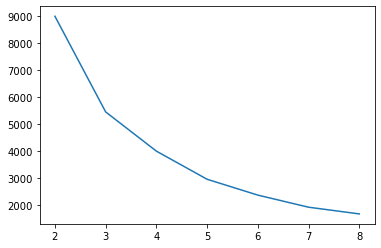

In [121]:
plt.plot(cl,wcsse)

# There is a sharp point at 3(reduction pt)

In [122]:
from sklearn.metrics import silhouette_score

In [123]:
sil=[]
cl=[2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i,random_state=0)
    mod.fit(rfm)
    s=silhouette_score(rfm,mod.labels_)
    sil.append(s)

In [124]:
sil

[0.9311831163690153,
 0.6018678448358707,
 0.6008370824164462,
 0.6154342209120944,
 0.5921950196200336,
 0.5251648726473496,
 0.5112467168513563]

In [125]:
#  there is a fair drop at point 3 )

In [126]:
mod3=KMeans(n_clusters=3,random_state=0)
mod3.fit(rfm)
rfm1['ClusterLabels']=mod3.labels_

In [127]:
rfm1['ClusterLabels'].unique()

array([0, 2, 1])

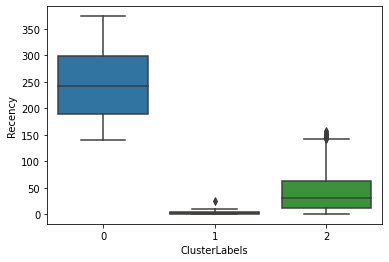

In [128]:
sns.boxplot(x=rfm1['ClusterLabels'],y=rfm1['Recency'])

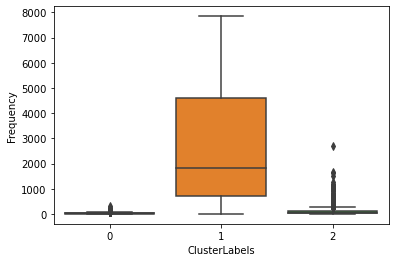

In [129]:
sns.boxplot(x=rfm1['ClusterLabels'],y=rfm1['Frequency'])

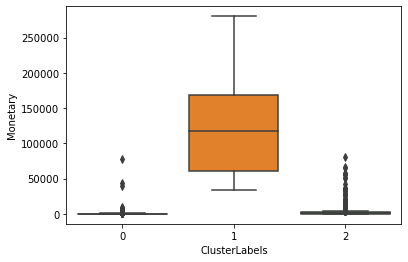

In [130]:
sns.boxplot(x=rfm1['ClusterLabels'],y=rfm1['Monetary'])

In [131]:
# lets check for 5 groups

In [132]:
mod5=KMeans(n_clusters=5,random_state=0)
mod5.fit(rfm)
rfm1['ClusterLabels5']=mod5.labels_

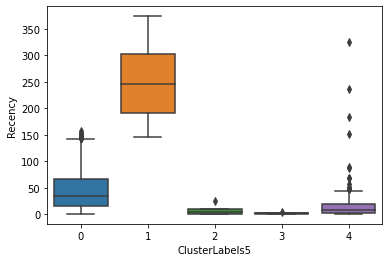

In [133]:
sns.boxplot(x=rfm1['ClusterLabels5'],y=rfm1['Recency'])

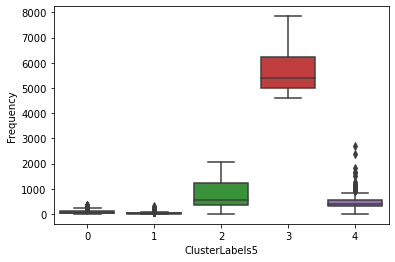

In [134]:
sns.boxplot(x=rfm1['ClusterLabels5'],y=rfm1['Frequency'])

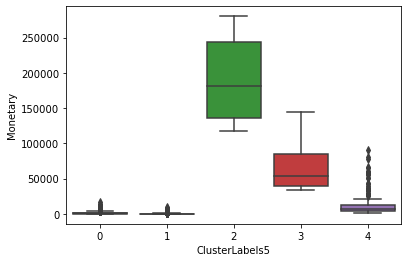

In [135]:
sns.boxplot(x=rfm1['ClusterLabels5'],y=rfm1['Monetary'])

In [136]:
# We can go with cluster 3

In [137]:
mod3=KMeans(n_clusters=3,random_state=0)
mod3.fit(rfm)
rfm1['ClusterLabels']=mod3.labels_

In [138]:
rfm1

,Recency,Frequency,Monetary,ClusterLabels,ClusterLabels5
CustomerID,,,,,
12346.0,326,1,77183.60,0,4
12347.0,3,182,4310.00,2,0
12348.0,76,31,1797.24,2,0
12349.0,19,73,1757.55,2,0
12350.0,311,17,334.40,0,1
...,...,...,...,...,...
18280.0,278,10,180.60,0,1
18281.0,181,7,80.82,0,1
18282.0,8,12,178.05,2,0


C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


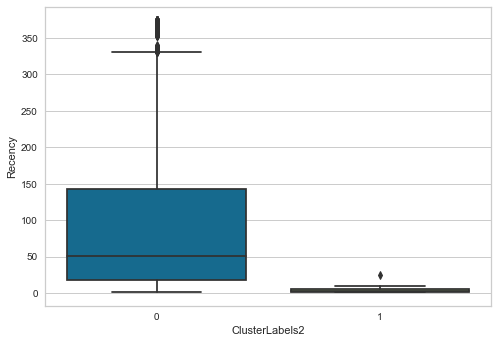

In [216]:
mod2=KMeans(n_clusters=2,random_state=0)
mod2.fit(rfm)
rfm1['ClusterLabels2']=mod2.labels_
sns.boxplot(rfm1['ClusterLabels2'],rfm1['Recency'])

C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


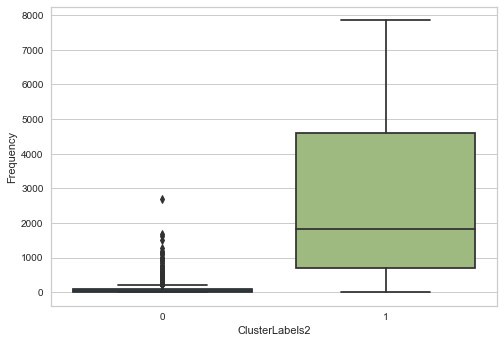

In [214]:
sns.boxplot(rfm1['ClusterLabels2'],rfm1['Frequency'])


C:\Users\sownd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


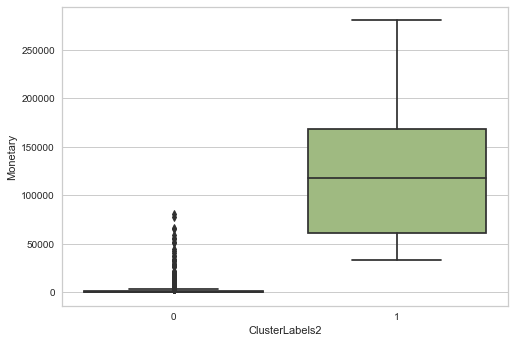

In [213]:
sns.boxplot(rfm1['ClusterLabels2'],rfm1['Monetary'])

In [217]:
# 3 Groups

# Gold= best customers
# Silver = Average Customers
# Bronze= Poor perfomance customers

In [141]:
gold=rfm1[rfm1['ClusterLabels']==2]

In [142]:
silver=rfm1[rfm1['ClusterLabels']==0]

In [143]:
bronze=rfm1[rfm1['ClusterLabels']==1]

In [144]:
# by quartiles method

# Defining the quartiles

In [145]:
rfm1.head()

,Recency,Frequency,Monetary,ClusterLabels,ClusterLabels5,ClusterLabels4,ClusterLabels2
CustomerID,,,,,,,
12346.0,326,1,77183.60,0,4,1,0
12347.0,3,182,4310.00,2,0,0,0
12348.0,76,31,1797.24,2,0,0,0
12349.0,19,73,1757.55,2,0,0,0
12350.0,311,17,334.40,0,1,1,0


In [146]:
rfm2=rfm1.copy()

In [147]:
rfm1.drop(columns=['ClusterLabels','ClusterLabels5'],inplace=True)

In [148]:
quantile=rfm1.quantile([0.25,0.50,0.75])

In [149]:
quantile

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2
0.25,18.00,17.0,307.415,0.0,0.0
0.50,51.00,41.0,674.485,0.0,0.0
0.75,142.75,100.0,1661.740,1.0,0.0


In [150]:
quant=quantile.to_dict()

In [151]:
quant

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000007},
 'ClusterLabels4': {0.25: 0.0, 0.5: 0.0, 0.75: 1.0},
 'ClusterLabels2': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [152]:
quant['Recency'][0.25]

18.0

# Less the recent purchase , more valuable customer

In [153]:
def Rscore(r):
    if(r<=quant['Recency'][0.25]):
        return 1
    elif(r<=quant['Recency'][0.50]):
        return 2
    elif(r<=quant['Recency'][0.75]):
        return 3
    elif(r>quant['Recency'][0.75]):
        return 4
def Fscore(f):
    if(f<=quant['Frequency'][0.25]):
        return 4
    elif(f<=quant['Frequency'][0.50]):
        return 3
    elif(f<=quant['Frequency'][0.75]):
        return 2
    elif(f>quant['Frequency'][0.75]):
        return 1
def Mscore(m):
    if(m<=quant['Monetary'][0.25]):
        return 4
    elif(m<=quant['Monetary'][0.50]):
        return 3
    elif(m<=quant['Monetary'][0.75]):
        return 2
    elif(m>quant['Monetary'][0.75]):
        return 1   

In [154]:
rfm1['RQuartile']=rfm1['Recency'].apply(lambda x:Rscore(x))
rfm1['FQuartile']=rfm1['Frequency'].apply(lambda x:Fscore(x))
rfm1['MQuartile']=rfm1['Monetary'].apply(lambda x:Mscore(x))

In [155]:
rfm1.head()

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1
12347.0,3,182,4310.00,0,0,1,1,1
12348.0,76,31,1797.24,0,0,3,3,1
12349.0,19,73,1757.55,0,0,2,2,1
12350.0,311,17,334.40,1,0,4,4,3


In [156]:
rfm1['RFMScore']=rfm1['RQuartile'].map(str)+rfm1['FQuartile'].map(str)+rfm1['MQuartile'].map(str)

In [157]:
rfm1.head()

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1,441
12347.0,3,182,4310.00,0,0,1,1,1,111
12348.0,76,31,1797.24,0,0,3,3,1,331
12349.0,19,73,1757.55,0,0,2,2,1,221
12350.0,311,17,334.40,1,0,4,4,3,443


In [158]:
# best  Customers, who are the champions of all the customers 
best_customers=rfm1[rfm1['RFMScore']=='111']
best_customers
# Loyal Customers
loyal_customers=rfm1[rfm1['FQuartile']==1 ]
len(loyal_customers)
# Those who spend a lot
high_purchase_customer=rfm1[rfm1['MQuartile']==1]
high_purchase_customer
lost_customers=rfm1[rfm1['RFMScore']=='444']
lost_customers
rfm1[(rfm1['FQuartile']==1) & (rfm1['RQuartile']==4)]
# Faithful Customers
rfm1[(rfm1['FQuartile']==1) & (rfm1['MQuartile']==3)]
# Your Newest Customers
rfm1[rfm1['FQuartile']==4]
# Slipping - Once Loyal, Now Gone
rfm1[(rfm1['RQuartile']==4) & (rfm1['FQuartile']==4)]

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1,441
12350.0,311,17,334.40,1,0,4,4,3,443
12353.0,205,4,89.00,1,0,4,4,4,444
12355.0,215,13,459.40,1,0,4,4,3,443
12361.0,288,10,189.90,1,0,4,4,4,444
...,...,...,...,...,...,...,...,...,...
18227.0,218,5,93.75,1,0,4,4,4,444
18233.0,326,1,440.00,1,0,4,4,3,443
18269.0,367,7,168.60,1,0,4,4,4,444


In [159]:
# rfm1[(rfm1['FQuartile']==1) & (rfm1['RQuartile']==4)]

In [160]:
quantile

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2
0.25,18.00,17.0,307.415,0.0,0.0
0.50,51.00,41.0,674.485,0.0,0.0
0.75,142.75,100.0,1661.740,1.0,0.0


###Loyal Customers, who are the champions of all the customers with highest score of RFM. 
rfm2_group1 = rfm2[rfm2['rfm']=='333']
rfm2_group1['label'] = 'champion'
###Customers who have the most potential to become the Champions. They recently buy the products and they make their purchases quite frequently. Moreover, the amount they spent is quite great. rfm2_group2 = rfm2[rfm2['rfm'].str.contains('332|331|323|313')] 
rfm2_group2['label'] = 'potential1'
###Customers whose frequency score and monetary score are slightly lower than potential 1 group
rfm2_group3 = rfm2[rfm2['rfm'].str.contains('321|322|311|312')] 
rfm2_group3['label'] = 'potential2'
###Customers who used to pay a lot of money and come to the store frequently. They did not purchase recently. 
rfm2_group4 = rfm2[rfm2['rfm'].str.contains('233')]
rfm2_group4['label'] = 'needing_attention1'
###Customers who do not come to store often and not frequently make purchases.
rfm2_group5 = rfm2[rfm2['rfm'].str.contains('223|213|212|231|232|211|221|222')]
rfm2_group5['label'] = 'needing_attention2'
###Customers who haven't paid a visit to the store for a long time. However, once in a while, they do spend lot of money
rfm2_group6 = rfm2[rfm2['rfm'].str.contains('132|123|113|133')]
rfm2_group6['label'] = 'lost1'
###Customers who churn
rfm2_group7 = rfm2[rfm2['rfm'].str.contains('111|112|121|122|131')]
rfm2_group7['label'] = 'lost2'

In [161]:
# Faithful Customers
rfm1[(rfm1['FQuartile']==1) & (rfm1['MQuartile']==3)]

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12556.0,51,121,603.71,0,0,2,1,3,213
12577.0,36,147,657.80,0,0,2,1,3,213
12743.0,135,134,546.43,0,0,3,1,3,313
12933.0,25,106,607.53,0,0,2,1,3,213
12970.0,8,151,452.24,0,0,1,1,3,113
13558.0,6,175,605.06,0,0,1,1,3,113
14044.0,27,209,652.82,0,0,2,1,3,213
14093.0,13,105,442.85,0,0,1,1,3,113
14382.0,27,131,626.07,0,0,2,1,3,213


In [162]:
# Your Newest Customers
rfm1[rfm1['FQuartile']==4]

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1,441
12350.0,311,17,334.40,1,0,4,4,3,443
12353.0,205,4,89.00,1,0,4,4,4,444
12355.0,215,13,459.40,1,0,4,4,3,443
12361.0,288,10,189.90,1,0,4,4,4,444
...,...,...,...,...,...,...,...,...,...
18277.0,59,8,110.38,0,0,3,4,4,344
18278.0,74,9,173.90,0,0,3,4,4,344
18280.0,278,10,180.60,1,0,4,4,4,444


In [163]:
# Slipping - Once Loyal, Now Gone
rfm1[(rfm1['RQuartile']==4) & (rfm1['FQuartile']==4)]

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1,441
12350.0,311,17,334.40,1,0,4,4,3,443
12353.0,205,4,89.00,1,0,4,4,4,444
12355.0,215,13,459.40,1,0,4,4,3,443
12361.0,288,10,189.90,1,0,4,4,4,444
...,...,...,...,...,...,...,...,...,...
18227.0,218,5,93.75,1,0,4,4,4,444
18233.0,326,1,440.00,1,0,4,4,3,443
18269.0,367,7,168.60,1,0,4,4,4,444


In [164]:
rfm1

,Recency,Frequency,Monetary,ClusterLabels4,ClusterLabels2,RQuartile,FQuartile,MQuartile,RFMScore
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,0,4,4,1,441
12347.0,3,182,4310.00,0,0,1,1,1,111
12348.0,76,31,1797.24,0,0,3,3,1,331
12349.0,19,73,1757.55,0,0,2,2,1,221
12350.0,311,17,334.40,1,0,4,4,3,443
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,0,4,4,4,444
18281.0,181,7,80.82,1,0,4,4,4,444
18282.0,8,12,178.05,0,0,1,4,4,144


In [165]:
# best  Customers
best_customers=rfm1[rfm1['RFMScore']=='111']
print('BestCustomers:',len(best_customers))
# Loyal Customers
loyal_customers=rfm1[rfm1['FQuartile']==1 ]
print('LoyalCustomers:',len(loyal_customers))
# Those who spend a lot
high_purchase_customer=rfm1[rfm1['MQuartile']==1]
print('HighCustomers:',len(high_purchase_customer))
lost_or_inactive_cust=rfm1[rfm1['RFMScore']=='444']
print('Lost or inactive customers:',len(lost_or_inactive_cust))

BestCustomers: 440
LoyalCustomers: 1080
HighCustomers: 1085
Lost or inactive customers: 385


In [166]:
# Customers whose frequency is high but who dont spend a lot
high_freq_low_mont=rfm1[(rfm1['FQuartile']==1)&(rfm1['MQuartile']==3)]
print('High Frequency but dont spend a lot:',len(high_freq_low_mont))

High Frequency but dont spend a lot: 60


In [167]:
# Comes once in while but purchases high value products

In [168]:
once_bt_high_purch=rfm1[rfm1['RFMScore']=='441']
print('Comes once in while but purchases high value products',len(once_bt_high_purch))

Comes once in while but purchases high value products 10


# Best Customers

In [169]:
ar1=list(best_customers.index)

In [170]:
bc=data[data['CustomerID'].isin(ar1)]
bc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010-12-01
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0,2010-12-01
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2,2010-12-01
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6,2010-12-01


# Now we can see that people from france also belong to the best customer list. Even though UK was dominant in number of customers, other customers also have their part

In [171]:
bc['Country'].value_counts()

United Kingdom    146937
EIRE                7075
France              3916
Germany             3662
Netherlands         2076
Portugal             784
Belgium              560
Norway               420
Switzerland          354
Sweden               198
Iceland              182
Spain                 23
Name: Country, dtype: int64

# No of transactions made by the best customers

In [172]:
bc.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('No of transactions').sort_values(by='No of transactions',ascending=False).head(10)

,No of transactions
CustomerID,
17841.0,7847
14911.0,5675
14096.0,5111
12748.0,4595
14606.0,2700
15311.0,2379
14646.0,2076
13089.0,1818
13263.0,1677


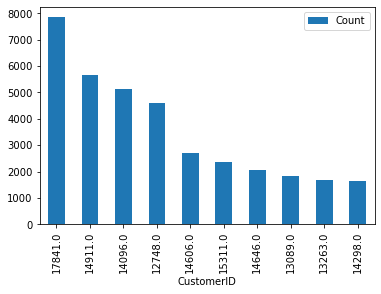

In [173]:
bc.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('Count').sort_values(by='Count',ascending=False).head(10).plot(kind='bar')

# Business intrepretation: The best customers are also always loyal so it is important to give them VIP treatment and acknowledge them

# Loyal Customers

In [174]:
ar2=loyal_customers.index

In [175]:
lc=data[data['CustomerID'].isin(ar2)]
lc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-09


In [176]:
lc['Country'].value_counts()

United Kingdom     254473
EIRE                 7236
Germany              6661
France               6248
Netherlands          2076
Spain                1805
Belgium              1296
Switzerland          1153
Australia             895
Portugal              784
Norway                704
Channel Islands       492
Cyprus                407
Italy                 338
Finland               294
Singapore             222
Sweden                198
Japan                 197
Iceland               182
Israel                171
Poland                149
Austria               137
Canada                135
Unspecified           134
Denmark               105
USA                   101
Name: Country, dtype: int64

In [177]:
lc.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('No of transactions').sort_values(by='No of transactions',ascending=False).head(10)

,No of transactions
CustomerID,
17841.0,7847
14911.0,5675
14096.0,5111
12748.0,4595
14606.0,2700
15311.0,2379
14646.0,2076
13089.0,1818
13263.0,1677


In [178]:
# Loyal customers are also present in best customers but Best customers wont be present in Loyal Customers.

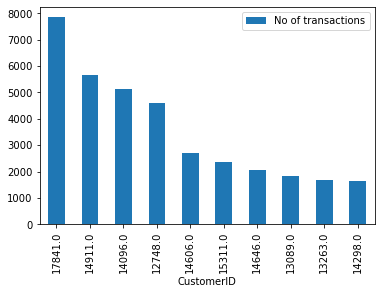

In [179]:
lc.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('No of transactions').sort_values(by='No of transactions',ascending=False).head(10).plot(kind='bar')

# High Purchase Customer

In [180]:
ar3=high_purchase_customer.index
hc=data[data['CustomerID'].isin(ar3)]
hc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [181]:
hc.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values('Sum',ascending=False).head(10)

,Sum
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


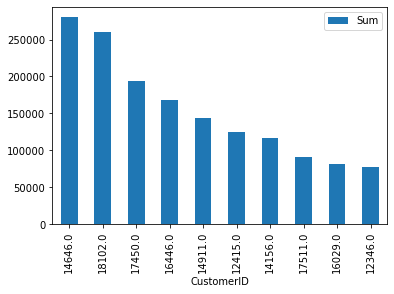

In [182]:
hc.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values('Sum',ascending=False).head(10).plot(kind='bar')

# Lost or inactive customers

In [183]:
ar4=lost_or_inactive_cust.index

In [184]:
lost_or_inactive=data[data['CustomerID'].isin(ar4)]

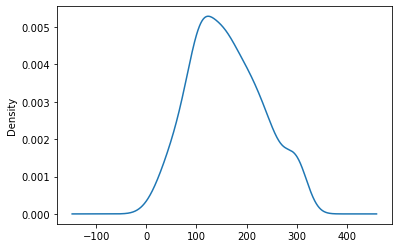

In [185]:
lost_or_inactive.groupby(['CustomerID'])['TotalPrice'].sum().plot(kind='kde')

In [186]:
trans_lost=lost_or_inactive.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('Transaction_count').sort_values(by='Transaction_count',ascending=False)
trans_lost.head()

,Transaction_count
CustomerID,
15552.0,17
16517.0,17
13803.0,17
13781.0,17
18185.0,17


# We can observe that the maximum transaction made by them is 17 which is low compared to other categories

# High frequency but low monetary customers

In [187]:
ar6=high_freq_low_mont.index
high_freq_low_mont_cust=data[data['CustomerID'].isin(ar6)]
high_freq_low_mont_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
882,536488,22738,RIBBON REEL SNOWY VILLAGE,5,2010-12-01 12:31:00,1.65,17897.0,United Kingdom,8.25,2010-12-01
883,536488,21621,VINTAGE UNION JACK BUNTING,1,2010-12-01 12:31:00,8.50,17897.0,United Kingdom,8.50,2010-12-01
884,536488,22960,JAM MAKING SET WITH JARS,8,2010-12-01 12:31:00,4.25,17897.0,United Kingdom,34.00,2010-12-01
885,536488,22082,RIBBON REEL STRIPES DESIGN,5,2010-12-01 12:31:00,1.65,17897.0,United Kingdom,8.25,2010-12-01
886,536488,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-01 12:31:00,3.75,17897.0,United Kingdom,3.75,2010-12-01


In [188]:
high_freq_low_mont_cust.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('Count').sort_values(by='Count',ascending=False).head()

,Count
CustomerID,
14529.0,229
16005.0,218
14044.0,209
17777.0,194
15756.0,192


In [189]:
ar7=once_bt_high_purch.index
once_bt_high_purch_cust=data[data['CustomerID'].isin(ar7)]
once_bt_high_purch_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.4,2010-12-02
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,1484.0,2010-12-02
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan,3794.4,2010-12-09
47291,540405,22499,WOODEN UNION JACK BUNTING,48,2011-01-07 09:50:00,4.95,14828.0,United Kingdom,237.6,2011-01-07
47292,540405,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2011-01-07 09:50:00,0.42,14828.0,United Kingdom,50.4,2011-01-07


In [190]:
once_bt_high_purch_cust.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head()

,Sum
CustomerID,
12346.0,77183.60
15749.0,44534.30
15098.0,39916.50
12755.0,3811.95
13135.0,3096.00


In [191]:
# best
# loyal
# High purchase cust
# lost ot inactive cust
# high freq low monrt
# once bt high freq

In [192]:
best1=bc.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)
loyal1=lc.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)
high_pur1=hc.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values('Sum',ascending=False).head(10)
lost1=lost_or_inactive.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)
high_fre_low_mont1=high_freq_low_mont_cust.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)
once_bt_high_pur1=once_bt_high_purch_cust.groupby(['CustomerID'])['TotalPrice'].sum().to_frame('Sum').sort_values(by='Sum',ascending=False).head(10)

In [199]:
final=pd.DataFrame()
final['Order']=np.arange(1,11)
final['Best_Customers']=best1['Sum'].values
final['Loyal_Customers']=loyal1['Sum'].values
final['High_Value_Monetary_Customers']=high_pur1['Sum'].values
final['Lost_Customers']=lost1['Sum'].values
final['High_Frequency_Low_Monetary_Cust']=high_fre_low_mont1['Sum'].values
final['Rare_Freq_High_Monetary_Cust']=once_bt_high_pur1['Sum'].values

In [204]:
final.drop(columns='Order',axis=1,inplace=True)

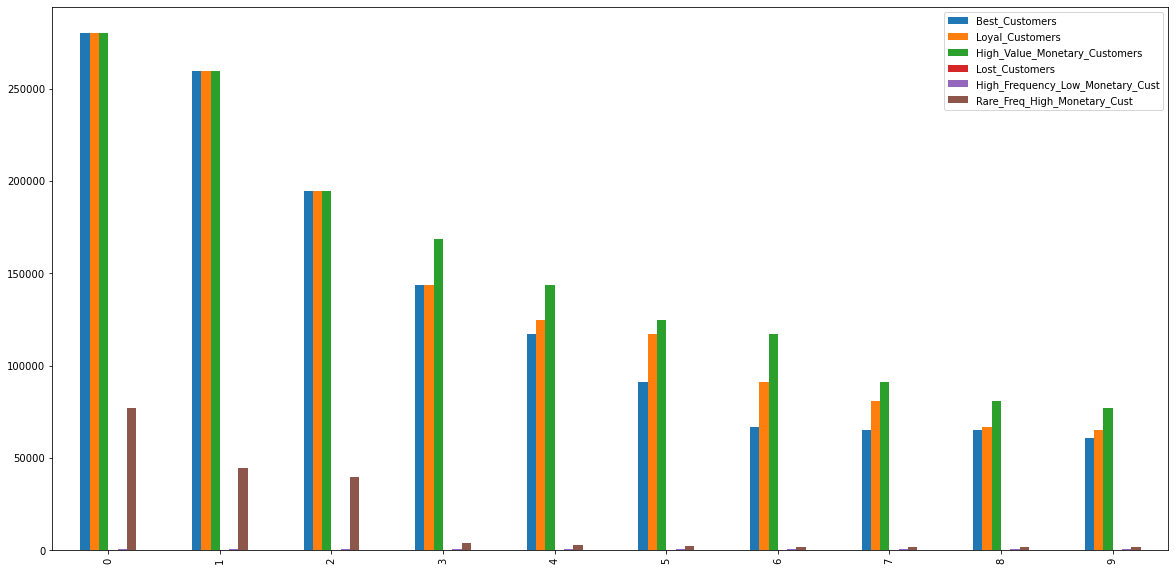

In [208]:
final.plot(kind='bar',figsize=(20,10))